In [1]:
import os
from ultralytics import YOLO

In [2]:
# Define paths
dataset_yaml = r"E:\yolo-v8\Helemet_detection\dataset\data.yaml"
weights_path = r"E:\yolo-v8\Helemet_detection\dataset\yolov8s.pt"  # Using YOLOv8 small model as base

In [3]:
# Initialize YOLO model
model = YOLO(weights_path)

In [4]:
# Train the model
model.train(data=dataset_yaml, epochs=5, imgsz=640)

Ultralytics YOLOv8.0.20  Python-3.7.2 torch-1.13.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=E:\yolo-v8\Helemet_detection\dataset\data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17,

In [5]:
save_dir = r"E:\yolo-v8\Helemet_detection\runs\train" 

In [6]:
best_weights_path = os.path.join(save_dir, 'helmet_detection', 'weights', 'best.pt')
print(f"Best model weights saved to {best_weights_path}")

Best model weights saved to E:\yolo-v8\Helemet_detection\runs\train\helmet_detection\weights\best.pt


In [1]:
import cv2
from ultralytics import YOLO

c:\users\rames\appdata\local\programs\python\python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Path to the saved model weights
best_weights_path = r"D:\dataset\dataset\runs\detect\train4\weights\best.pt"

In [3]:
# Initialize the model with the saved weights
modell = YOLO(best_weights_path)

In [4]:
# Load class names
class_names = modell.names 
print(class_names)

{0: 'non-helmet', 1: 'helmet'}


In [23]:
# Path to an image
image_path = r"D:\Rider-not-wearing-helmet-Figure-4-shows-the-detection-of-the-license-plate.png"

In [24]:
class_names = ['non-helmet', 'helmet']

In [25]:
# Perform inference
results = modell.predict(image_path)


image 1/1 D:\Rider-not-wearing-helmet-Figure-4-shows-the-detection-of-the-license-plate.png: 640x608 2 non-helmets, 805.1ms
Speed: 10.5ms preprocess, 805.1ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 608)


In [26]:
import cv2
# Load the image
img = cv2.imread(image_path)

In [27]:
# Process each result
for result in results:
    # Bounding boxes in [x1, y1, x2, y2] format
    boxes = result.boxes.xyxy.numpy()  # Convert to numpy array if needed
    scores = result.boxes.conf.numpy()  # Confidence scores
    class_ids = result.boxes.cls.numpy().astype(int)  # Class IDs

    for box, score, class_id in zip(boxes, scores, class_ids):
        x1, y1, x2, y2 = map(int, box)  # Convert coordinates to integers
        label = class_names[class_id]  # Get class name
        color = (255, 0, 0)  # Color for the bounding box (red)
        thickness = 2  # Thickness of the bounding box

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

        # Add label
        label_position = (x1, y1 - 10)  # Position for the label
        cv2.putText(img, f"{label} {score:.2f}", label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Save or display the image with labels
output_image_path = r"E:\yolo-v8\Helemet_detection\dataset\test\images\result_with_labels.jpg"
cv2.imwrite(output_image_path, img)
print(f"Image with labels saved to {output_image_path}")

Image with labels saved to E:\yolo-v8\Helemet_detection\dataset\test\images\result_with_labels.jpg


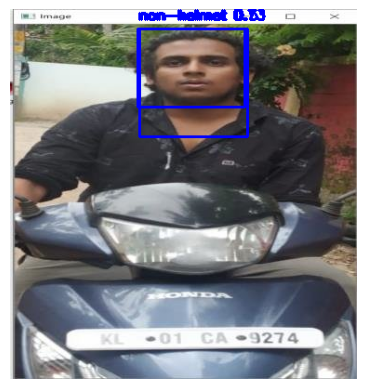

In [28]:
import matplotlib.pyplot as plt
import cv2

# Convert image to RGB (matplotlib expects RGB images)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()
